In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, time, json
import pandas as pd
from openai import OpenAI
from tqdm.auto import tqdm
import spacy

import sys
sys.path.append("../")
import os

import logging
from src.utils import logging_utils
from src.utils import env_utils
from src import functional

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}")
logger.info(f"{transformers.__version__=}")

/disk/u/arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-02-02 13:05:11 __main__ INFO     torch.__version__='2.5.1+cu124', torch.version.cuda='12.4'
2025-02-02 13:05:11 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-02-02 13:05:11 __main__ INFO     transformers.__version__='4.48.0'


In [3]:
from src.probing.utils import ProbingLatents
import numpy as np

latents_npz = np.load("../results/probing_latents/Llama-3.2-3B/actors/0a7fd4c6c046bf2eed09485d0bc4b490.npz", allow_pickle=True)

latents = ProbingLatents.from_npz(latents_npz)

In [4]:
print(latents.latents.keys())
print(list(range(*latents.prompt.query_range)))

dict_keys([('model.layers.0', 206), ('model.layers.0', 207), ('model.layers.0', 208), ('model.layers.0', 209), ('model.layers.0', 210), ('model.layers.0', 211), ('model.layers.0', 212), ('model.layers.0', 213), ('model.layers.0', 214), ('model.layers.0', 215), ('model.layers.0', 216), ('model.layers.1', 206), ('model.layers.1', 207), ('model.layers.1', 208), ('model.layers.1', 209), ('model.layers.1', 210), ('model.layers.1', 211), ('model.layers.1', 212), ('model.layers.1', 213), ('model.layers.1', 214), ('model.layers.1', 215), ('model.layers.1', 216), ('model.layers.2', 206), ('model.layers.2', 207), ('model.layers.2', 208), ('model.layers.2', 209), ('model.layers.2', 210), ('model.layers.2', 211), ('model.layers.2', 212), ('model.layers.2', 213), ('model.layers.2', 214), ('model.layers.2', 215), ('model.layers.2', 216), ('model.layers.3', 206), ('model.layers.3', 207), ('model.layers.3', 208), ('model.layers.3', 209), ('model.layers.3', 210), ('model.layers.3', 211), ('model.layers

In [5]:
MODEL_NAME = "Llama-3.2-3B"
LATENT_ROOT = os.path.join(env_utils.DEFAULT_RESULTS_DIR, "probing_latents", MODEL_NAME)
TOKEN_IDX = -1
LAYER_NAME_FORMAT = "model.layers.{}"
LAYER_NAME = LAYER_NAME_FORMAT.format(2)

In [33]:
from src.probing.utils import load_probing_activations

cls_activations = load_probing_activations(
    latent_root=LATENT_ROOT,
    token_query_pos=TOKEN_IDX,
    layers=[LAYER_NAME],
    limit=200,
)

2025-02-02 13:28:11 src.probing.utils INFO     cls='scientists' ... loading 200 latents ...


100%|█████████▉| 199/200 [00:18<00:00, 10.49it/s]

2025-02-02 13:28:30 src.probing.utils INFO     cls='politicians' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:19<00:00, 10.00it/s]

2025-02-02 13:28:50 src.probing.utils INFO     cls='musicians' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:16<00:00, 12.40it/s]

2025-02-02 13:29:06 src.probing.utils INFO     cls='writers' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:19<00:00, 10.33it/s]

2025-02-02 13:29:26 src.probing.utils INFO     cls='basketball' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:17<00:00, 11.70it/s]

2025-02-02 13:29:43 src.probing.utils INFO     cls='actors' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:16<00:00, 11.74it/s]

2025-02-02 13:30:00 src.probing.utils INFO     cls='golf' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:17<00:00, 11.58it/s]

2025-02-02 13:30:17 src.probing.utils INFO     cls='chef' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:19<00:00, 10.08it/s]

2025-02-02 13:30:37 src.probing.utils INFO     cls='soccer' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:19<00:00, 10.31it/s]

2025-02-02 13:30:56 src.probing.utils INFO     cls='cricket' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:19<00:00, 10.28it/s]


2025-02-02 13:31:15 src.probing.utils INFO     cls='tennis' ... loading 200 latents ...


100%|█████████▉| 199/200 [00:20<00:00,  9.94it/s]

2025-02-02 13:31:35 src.probing.utils INFO     cls='baseball' ... loading 200 latents ...



100%|█████████▉| 199/200 [00:16<00:00, 11.93it/s]


In [7]:
cls_activations["actors"][5][LAYER_NAME].shape

torch.Size([3072])

In [ ]:
import random

data = []
for cls, activations in cls_activations.items():
    for act in activations:
        latent = act[LAYER_NAME]
        data.append((latent, cls))


random.shuffle(data)

validation_split = 0.3
cut_idx = int(len(data) * (1 - validation_split))
train_data = data[:cut_idx]
validation_data = data[cut_idx:]



train_X, train_y = zip(*train_data)
validation_X, validation_y = zip(*validation_data)

2025-02-02 13:08:48 __main__ INFO     len(train_data)=1680, len(validation_data)=720


In [9]:
torch.stack(train_X).shape

torch.Size([1680, 3072])

In [14]:
from src.probing.analysis import LinearProbe

probe = LinearProbe.from_data(
    acts = torch.stack(train_X),
    labels = train_y,

    validation_set = (validation_X, validation_y),
    batch_size=1000,
)

{'scientists': 0, 'musicians': 1, 'golf': 2, 'cricket': 3, 'basketball': 4, 'actors': 5, 'tennis': 6, 'soccer': 7, 'chef': 8, 'writers': 9, 'baseball': 10, 'politicians': 11}
2025-02-02 13:10:01 src.probing.analysis DEBUG    Epoch 50/1000, Loss: 2.482667922973633, Validation Accuracy: 0.1111
2025-02-02 13:10:02 src.probing.analysis DEBUG    Epoch 100/1000, Loss: 2.4810354709625244, Validation Accuracy: 0.1097
2025-02-02 13:10:02 src.probing.analysis DEBUG    Epoch 150/1000, Loss: 2.4794983863830566, Validation Accuracy: 0.1000
2025-02-02 13:10:02 src.probing.analysis DEBUG    Epoch 200/1000, Loss: 2.4779820442199707, Validation Accuracy: 0.0958
2025-02-02 13:10:02 src.probing.analysis DEBUG    Epoch 250/1000, Loss: 2.4764671325683594, Validation Accuracy: 0.0958
2025-02-02 13:10:03 src.probing.analysis DEBUG    Epoch 300/1000, Loss: 2.474945545196533, Validation Accuracy: 0.0958
2025-02-02 13:10:03 src.probing.analysis DEBUG    Epoch 350/1000, Loss: 2.4734079837799072, Validation Accur

In [15]:
val_acc, conf_matrix = probe.validate(torch.stack(validation_X), validation_y, batch_size=1000, return_confusion_matrix=True)
val_acc

0.22777777777777777

2025-02-02 13:10:10 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f54d85f3290>


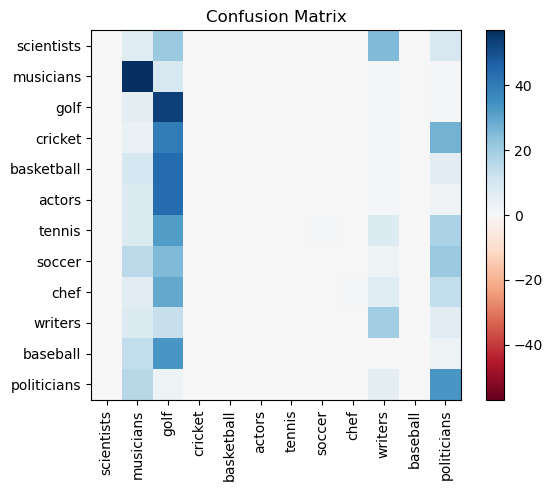

In [16]:
from src.plotting import matrix_heatmap

matrix_heatmap(
    matrix=conf_matrix,
    limit_dim = conf_matrix.shape[0],
    title="Confusion Matrix",
    tick_labels=list(probe.class_map.keys()),
)

In [28]:
from src.functional import detensorize

linear_probe_save_dir = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR, 
    "linear_probes", MODEL_NAME, LAYER_NAME, str(TOKEN_IDX)
)
os.makedirs(linear_probe_save_dir, exist_ok=True)

probe.save(os.path.join(linear_probe_save_dir, f"probe.pt"))

info = dict(
    model = MODEL_NAME,
    layer = LAYER_NAME,
    token_idx = TOKEN_IDX,
    val_acc = val_acc,
    conf_matrix = conf_matrix,
)

info = detensorize(info)

with open(os.path.join(linear_probe_save_dir, "info.json"), "w") as f:
    json.dump(info, f)

In [29]:
test_probe = LinearProbe.from_pretained(
    path=os.path.join(linear_probe_save_dir, f"probe.pt"),
)

/disk/u/arnab/Codes/Projects/retrieval/notebooks/../src/probing/analysis.py:126: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pt = torch.load(path)


In [30]:
test_probe.validate(torch.stack(validation_X), validation_y, batch_size=1000)

0.22777777777777777